In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn import linear_model
from datetime import datetime
import sklearn.metrics as metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from math import sqrt
from sklearn.metrics import r2_score
import datetime

In [2]:
df = pd.read_csv("covid_data_Machine_Learning_2.csv", index_col='id')

In [3]:
df.head()

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
id,,,,,,
1,2020-01-03,Afghanistan,0,0,0,0
2,2020-01-04,Afghanistan,0,0,0,0
3,2020-01-05,Afghanistan,0,0,0,0
4,2020-01-06,Afghanistan,0,0,0,0
5,2020-01-07,Afghanistan,0,0,0,0


In [4]:
df['New_cases']

id
1           0
2           0
3           0
4           0
5           0
         ... 
205080     56
205081      0
205082    486
205083    259
205084    199
Name: New_cases, Length: 205084, dtype: int64

In [5]:
Country = input("Enter country name : ")

Enter country name : India


In [6]:
def CreateTempdf(data, country):
    temp_df = data[data["Country"]==country]
    new_id = [x for x in range(1,len(temp_df)+1)]
    temp_df.insert(0,"new_id",new_id)
    
    return temp_df

In [7]:
def Prediction(final_data, country, days):
    req_col = final_data[['New_cases','New_deaths','Cumulative_deaths']]
    Result = np.zeros(shape=(3,1))
    for i in range(len(req_col)):
        Result[i] = CreateModel(final_data,req_col.iloc[:,[i]],days,i)
        if(i==2):
            break;
     
    return Result

In [8]:
def CreateModel(final_data,req_col,days,i):
    x = np.array(final_data['new_id']).reshape(-1,1)
    y = np.array(req_col).reshape(-1,1)
    
 
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    
    model = linear_model.LinearRegression()
    model.fit(x_train,y_train)
    test_predict = model.predict(x_test)
    print('linear_regression')
    
    print ("R2 Score value: {:.4f}".format(r2_score(y_test,test_predict)))
    print('MAE: {}'.format(metrics.mean_absolute_error(y_test, test_predict)))
    print('MSE: {}'.format(metrics.mean_squared_error(y_test, test_predict)))
    print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, test_predict))))
    
    print('\n')
    
    model2 = RandomForestRegressor(n_estimators = 212,max_features='sqrt',max_depth=4)
    model2.fit(x_train, y_train.ravel())
    test_predict2 = model2.predict(x_test)
    print('Random_Forest')
   
    print ("R2 Score value: {:.4f}".format(r2_score(y_test,test_predict2)))
    print('MAE: {}'.format(metrics.mean_absolute_error(y_test, test_predict2)))
    print('MSE: {}'.format(metrics.mean_squared_error(y_test, test_predict2)))
    print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, test_predict2))))
    
    print('\n\n\n')
   
    figure, axis = plt.subplots()
  
    if(i==0):
        axis.plot(y_test,'-m')
        axis.plot(test_predict2,'--b')
        axis.set_title("New Cases")
    
    if(i==1):
        axis.plot(y_test,'-m')
        axis.plot(test_predict2,'--b')
        axis.set_title("New Deaths")
    
    if(i==2):
        axis.plot(y_test,'-m')
        axis.plot(test_predict2,'--b')
        axis.set_title("Cumulative Deaths")
  
    plt.show()
        
    return(int(model2.predict([[final_data['new_id'].iloc[-1] + days]])))

In [9]:
def days_difference(data):
   
    d0 = data['Date_reported'].max()
    d1=datetime.datetime.strptime(d0,"%Y-%m-%d").date() 
    date_entry = input('Enter a date in YYYY-MM-DD format :')
    
    
    date_1=datetime.datetime.strptime(date_entry,"%Y-%m-%d").date()  
    diff = (date_1 - d1).days
    return diff

Enter a date in YYYY-MM-DD format :2022-06-18
linear_regression
R2 Score value: 0.0118
MAE: 47567.17735938108
MSE: 5432684050.655342
RMSE: 73706.74359009047


Random_Forest
R2 Score value: 0.8679
MAE: 14605.181027004493
MSE: 726268069.0050896
RMSE: 26949.361198460523






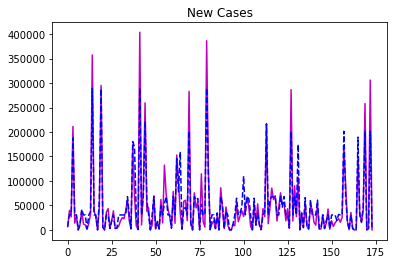

linear_regression
R2 Score value: -0.0026
MAE: 615.1250699145244
MSE: 973563.120418131
RMSE: 986.693022382408


Random_Forest
R2 Score value: 0.8632
MAE: 155.12044076549677
MSE: 132856.1012785184
RMSE: 364.49430897960315






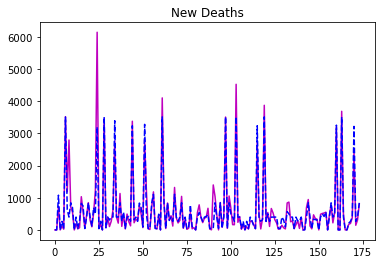

linear_regression
R2 Score value: 0.9406
MAE: 40471.421994494835
MSE: 2274710761.571092
RMSE: 47693.92793187716


Random_Forest
R2 Score value: 0.9991
MAE: 3981.1075221523924
MSE: 33587829.822016455
RMSE: 5795.500825814492






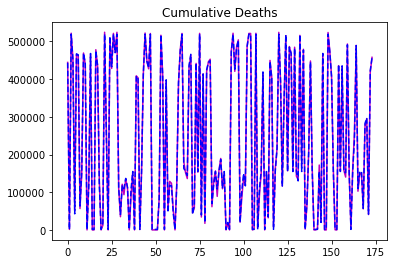

array([[2.7700e+03],
       [4.2000e+01],
       [5.1917e+05]])

In [10]:
import numpy as np
import datetime

new_df = CreateTempdf(df,Country)
days = days_difference(new_df)
input_new_cases=Prediction(new_df, Country, days)
input_new_cases

In [10]:
s_no = len(new_df)+days
input_new_cases=np.insert(input_new_cases,0,s_no)
input_new_cases

array([8.9700e+02, 2.9790e+03, 3.9000e+01, 5.1973e+05])

In [11]:
input_new_cases_2d = np.reshape(input_new_cases, (1, 4))
input_new_cases_2d

array([[8.9700e+02, 2.9790e+03, 3.9000e+01, 5.1973e+05]])

linear_regression
R2 Score value: 0.9918
MAE: 1271500.4244058179
MSE: 2049987471507.417
RMSE: 1431777.7311815605




C:\Users\Prachi\AppData\Local\Temp\ipykernel_15940\2940796985.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model4.fit(x_train, y_train)


Random_Forest
R2 Score value: 0.9987
MAE: 359616.27198480384
MSE: 327433460646.1618
RMSE: 572218.0184563937
       new_id  New_cases  New_deaths  Cumulative_deaths
id                                                     
83425       1          0           0                  0
83426       2          0           0                  0
83427       3          0           0                  0
83428       4          0           0                  0
83429       5          0           0                  0
...       ...        ...         ...                ...
84289     865       2202          27             524241
84290     866       1569          19             524260
84291     867       1829          33             524293
84292     868       2364          10             524303
84293     869       2259          20             524323

[869 rows x 4 columns]


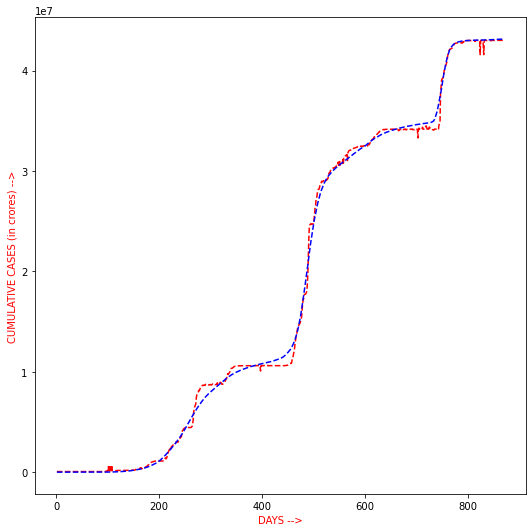

In [53]:
x = new_df[['new_id','New_cases','New_deaths','Cumulative_deaths']]
y = new_df[['Cumulative_cases']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model3 = linear_model.LinearRegression()
model3.fit(x_train,y_train)
test_predict3 = model3.predict(x_test)
print('linear_regression')
    
print ("R2 Score value: {:.4f}".format(r2_score(y_test,test_predict3)))
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, test_predict3)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, test_predict3)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, test_predict3))))
    
print('\n')





model4 = RandomForestRegressor(n_estimators = 212,max_features='sqrt',max_depth=4)
model4.fit(x_train, y_train)
test_predict4 = model4.predict(x_test)
print('Random_Forest')
   
print ("R2 Score value: {:.4f}".format(r2_score(y_test,test_predict4)))
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, test_predict4)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, test_predict4)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, test_predict4))))

predict = model4.predict(x)
print(x)
x = new_df[['new_id']].to_numpy().flatten()
plt.rcParams["figure.figsize"] = [7.50, 7.50]
plt.rcParams["figure.autolayout"] = True
y = y.to_numpy().flatten()
plt.plot(x,predict,color='red', linestyle='dashed')
plt.plot(x,y,color='blue', linestyle='dashed')
plt.xlabel('DAYS -->', color='red',fontsize='10', horizontalalignment='center')
plt.ylabel('CUMULATIVE CASES (in crores) -->', color='red',fontsize='10', horizontalalignment='center')
plt.show()


In [41]:
test_predict4

array([32320331.25798666,   122400.06534186, 10548054.02810159,
          65553.70586507, 34211630.62799843, 43005680.53398921,
       42952981.69171213, 43006472.43316936, 27760734.39359628,
       34031398.64056479,  2710359.81291374, 43006594.51587377,
        1258522.72363186, 32217128.36180004,   592337.6259574 ,
       38708384.64382745,  8319170.13164268,  9956514.37051922,
        8366779.83562352, 14928240.67523596,   113047.20191436,
        3052202.96355279,  1152928.88605666, 43006390.2235557 ,
       11407456.52756328,   443866.72598305, 10548054.02810159,
       10338693.88146891, 33446643.57167735,   462372.90802827,
          65553.70586507,  2377379.37299208,    65682.69520825,
       10551871.53488225, 34087052.83578459, 34170112.06076914,
        4719315.96445788,  4719315.96445788, 28765515.48312155,
       24390950.86901365, 10561088.49254069,  1238726.92660406,
       32129837.84043047, 10548054.02810159, 29959065.68948567,
          65553.70586507,  4318160.17342

In [56]:
ff=y_test['Cumulative_cases']

In [23]:
y_test

,Cumulative_cases
id,
83957,29762793
84158,35018358
84152,34822040
83905,17636307
84209,42894345
...,...
83803,10527683
83966,30233183
83576,198706


In [13]:
model3.predict(input_new_cases_2d)   # Linear Regression

C:\Users\Prachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[41020787.01153378]])

In [14]:
model4.predict(input_new_cases_2d)   # Random Forest Regression

C:\Users\Prachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([42859135.81323018])

In [15]:
model3.score(x,y) # Linear Regression

0.9924026548426378

In [16]:
model4.score(x,y)# Random Forest Regression

0.9985867315432123

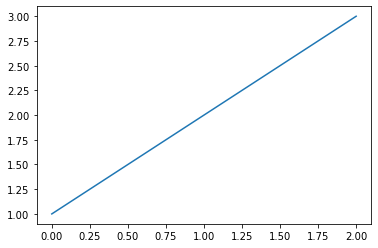

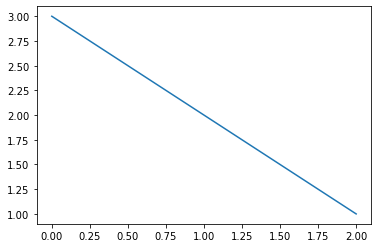

In [11]:
import matplotlib.pyplot as plt

plt.figure() # creates a figure
plt.plot([1,2,3])

plt.figure() # creates a new figure
plt.plot([3,2,1])

plt.show() # 